In [1]:
import sys
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.layers import  Dropout, Dense, Flatten, RepeatVector, Conv2D
from tensorflow.keras.models import Sequential, model_from_json
# from tensorflow.keras.utils.vis_utils import plot_model
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics
import pandas as pd
from data_preprocessing import DataPreprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pydot


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

In [2]:
x_train = pd.read_csv('5_test_train_dataset/x_test.csv')['review']
x_test = pd.read_csv('5_test_train_dataset/x_train.csv')['review']
y_train = pd.read_csv('5_test_train_dataset/y_test.csv')
y_test = pd.read_csv('5_test_train_dataset/y_train.csv')

# DNN Model

In [3]:
def TFIDF(X_train, X_test,MAX_NB_WORDS=75000):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    X_train = vectorizer_x.fit_transform(X_train).toarray()
    X_test = vectorizer_x.transform(X_test).toarray()
    print("tf-idf with",str(np.array(X_train).shape[1]),"features")
    #print("Voacb: ",list(vectorizer_x.vocabulary_.keys()))
    return (X_train,X_test)

In [116]:
def Build_Model_DNN_Text(shape, nClasses, dropout=0.5):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
#     model.add(Flatten())
    model.add(Dense(nClasses, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model



X_train_tfidf,X_test_tfidf = TFIDF(x_train,x_test)

model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 20)
history = model_DNN.fit(X_train_tfidf, y_train1,
                              validation_data=(X_test_tfidf, y_test1),
                              epochs=20,
                              batch_size=128,
                              verbose=2)
predicted = model_DNN.predict(X_test_tfidf)
print(metrics.classification_report(y_test1, np.round(predicted)))
print(predicted)

tf-idf with 58196 features
Train on 12600 samples, validate on 3150 samples
Epoch 1/20
 - 69s - loss: 0.2321 - accuracy: 0.8597 - val_loss: 0.1810 - val_accuracy: 0.8671
Epoch 2/20
 - 76s - loss: 0.1851 - accuracy: 0.8670 - val_loss: 0.1797 - val_accuracy: 0.8671
Epoch 3/20


KeyboardInterrupt: 

In [17]:
from __future__ import division
def transform_binary_to_continuous(df):
    df1 = df.copy().astype(float)
    for i, row in df.iterrows():
        n2 = 0
        for j, row1 in row.iteritems():
            if row1 == np.int64(1):
                n2 += 1
        for j, row1 in row.iteritems(): 
            if n2!=0 :
#                 pass
#                 print(i, " ", j)
                df1.at[i, j] = row1/n2
    return df1
y_test1 = transform_binary_to_continuous(y_test)
y_train1 = transform_binary_to_continuous(y_train) 
print(y_test1.head())
print(y_test.shape)
# print(type(y_test.head().iloc[0]["Crime"]))
# print(y_test.to_numpy()[3])

   Action  Adventure  Animation  Biography  Comedy  Crime     Drama  Fantasy  \
0     0.0        0.0        0.0        0.0     0.0    0.0  0.333333      0.0   
1     0.0        0.0        0.0        0.0     0.0    0.0  0.333333      0.0   
2     0.0        0.0        0.0        0.0     0.0    0.0  0.333333      0.0   
3     0.0        0.0        0.0        0.0     0.0    0.0  0.333333      0.0   
4     0.0        0.0        0.0        0.0     0.0    0.0  0.000000      0.0   

    History  Horror  Music  Mystery  Romance  Sci-Fi  Sport  Thriller  \
0  0.333333     0.0    0.0      0.0      0.0     0.0    0.0       0.0   
1  0.333333     0.0    0.0      0.0      0.0     0.0    0.0       0.0   
2  0.333333     0.0    0.0      0.0      0.0     0.0    0.0       0.0   
3  0.333333     0.0    0.0      0.0      0.0     0.0    0.0       0.0   
4  0.000000     0.0    0.0      0.0      1.0     0.0    0.0       0.0   

        War  
0  0.333333  
1  0.333333  
2  0.333333  
3  0.333333  
4  0.00000

# history of DNN model

In [53]:
# plot_model(model_DNN, to_file='model_DNN_plot.png', show_shapes=True, show_layer_names=True)
from PIL import Image
from io import BytesIO

def plot_model_loss_acc(history_dict = None, plot_name="", auc_var = "auc"):
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    history = history_dict
    print(history.keys())
    # summarize history for accuracy
    plt.grid(b=None)
    plt.plot(history[auc_var])
    plt.plot(history[f'val_{auc_var}'])
    plt.title('model accuracy')
    plt.ylabel('auc_score')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(plot_name + '.tiff', facecolor=fig.get_facecolor(), edgecolor='none', dpi=300, format="tiff", pil_kwargs={"compression": "tiff_lzw"})
    

Index(['epoch', 'auc_1', 'loss', 'val_auc_1', 'val_loss'], dtype='object')


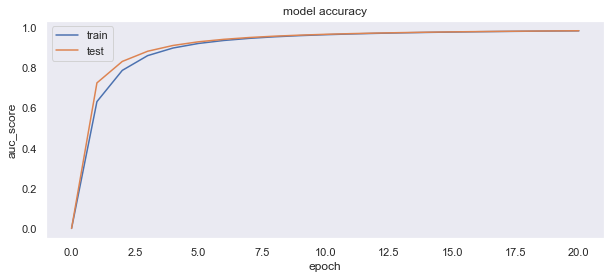

In [57]:
log_data = pd.read_csv('DNN_training.log', sep=',', engine='python')
plot_model_loss_acc(log_data, "model_dnn", auc_var = "auc_1")

In [15]:
from ann_visualizer.visualize import ann_viz

ann_viz(model_DNN, title="DNN model", filename="DNN_model.gv")

In [16]:
# serialize model to JSON
model_DNN_json = model_DNN.to_json()
with open("model_DNN_4_layers.json", "w") as json_file:
    json_file.write(model_DNN_json)
# serialize weights to HDF5
model_DNN.save_weights("model_DNN_4_layers.h5")
print("Saved model to disk")

Saved model to disk


In [30]:
# load json and create model
def load_model(json_file, h5_file):
    json_file = open(json_file, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(h5_file)
    print("Loaded model from disk")
    return loaded_model

# Predict by DNN

In [5]:
x_train = pd.read_csv('5_test_train_dataset/x_test.csv')['review']
loaded_model = load_model("model_DNN_4_layers.json", "model_DNN_4_layers.h5")

Loaded model from disk


In [22]:
X_train_tfidf,X_test_tfidf = TFIDF(x_train,x_test)

predicted = loaded_model.predict(X_test_tfidf)
print(metrics.classification_report(y_test, np.round(predicted)))
# print(np.sum(predicted[0]))
print(metrics.accuracy_score(y_test, np.round(predicted)))

tf-idf with 73235 features
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1184
           1       0.93      0.90      0.92      1028
           2       0.93      0.96      0.94       316
           3       0.98      0.87      0.92       600
           4       0.97      0.93      0.95      1216
           5       0.92      0.89      0.91       532
           6       0.96      0.94      0.95      2208
           7       0.87      0.88      0.87       452
           8       0.93      0.89      0.91       428
           9       0.93      0.91      0.92       408
          10       0.94      0.94      0.94       380
          11       0.78      0.81      0.80       432
          12       0.95      0.88      0.91       536
          13       0.77      0.91      0.84       504
          14       0.98      0.92      0.95       396
          15       0.87      0.87      0.87       616
          16       0.94      0.89      0.91       392


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
predicted = loaded_model.predict(X_test_tfidf)
# print(metrics.classification_report(y_test1, predicted))
predicted1 = (predicted)
# print(predicted1)
for idx, row in enumerate(predicted1):
    sum=0
    for row2 in row:
        sum += row2
    for idx2, row2 in enumerate(row):
        predicted1[idx][idx2] = predicted1[idx][idx2]*1.0/sum
# print((predicted1*1.0/sum))
print(metrics.r2_score(y_test1, predicted1))
print(metrics.mean_squared_error(y_test1, predicted1))
from math import sqrt

print("RMSE: "+ str(sqrt(metrics.mean_squared_error(y_test1, predicted1))))

0.8256210282974955
0.003616034081795466
RMSE: 0.060133468898737795


In [29]:
from review_download import ReviewDl

url = "https://www.imdb.com/title/tt9052870/reviews/_ajax?ref_=undefined&paginationKey="
# print(dir(ReviewDownloader))
x = ReviewDl(url).down("chhichhore")

100 number of reviews scraped
200 number of reviews scraped
300 number of reviews scraped
400 number of reviews scraped
500 number of reviews scraped
600 number of reviews scraped


tf-idf with 73235 features
[[ 0.  0.  0. 33.  0.  0. 34.  0.  0.  0.  0.  0.  0.  0. 33.  0.  0.]]


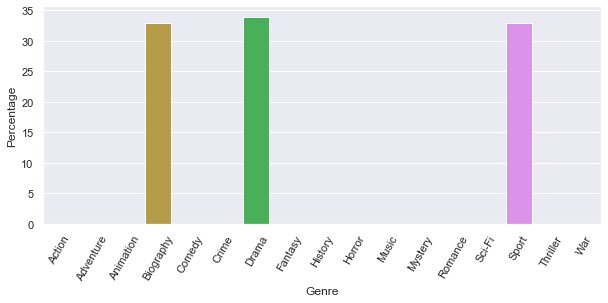

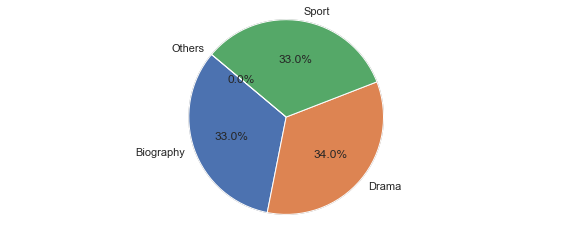

In [8]:
movie_name = "chhichhore"
with open(f"DNN_input_files/input2-{movie_name}.txt", "r") as fi:
    test_review = fi.read()
test_review = DataPreprocessing(test_review).preprocess()

train_review, test_review = TFIDF(x_train,[test_review])
predicted = loaded_model.predict(test_review)
predicted1 = (predicted)
sum=0
for num in predicted1[0]:
    sum += num
print(np.round(predicted1*100.0/sum))
pred = np.round(predicted1*100.0/sum)
genre_list = [
    'Action',
    'Adventure',
    'Animation',
    'Biography',
    'Comedy',
    'Crime',
    'Drama',
    'Fantasy',
    'History',
    'Horror',
    'Music',
    'Mystery',
    'Romance',
    'Sci-Fi',
    'Sport',
    'Thriller',
    'War'
]


top_df = pd.DataFrame(list(zip(genre_list,pred[0])))
top_df.columns=["Genre", "Percentage"]#Barplot of most freq words
sns.set(rc={'figure.figsize':(10,4)})
g = sns.barplot(x="Genre", y="Percentage", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=60)



def pieplot(x_data, y_label) :
#     explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    data = list(zip(x_data, y_label))

    exploded = []
    y_label_1 = []
    gt_10_values = []
    gt_10_genres = []
    others = 0
    for i, percent in enumerate(x_data):
        if percent >= 10:
            gt_10_values.append(percent)
            gt_10_genres.append(y_label[i])
        else:
            others += percent
    gt_10_values.append(others)
    gt_10_genres.append("Others")
#     top_3_tuples = data[0:3]
    fig1, ax1 = plt.subplots()
    
    ax1.pie(gt_10_values, labels=gt_10_genres, autopct='%1.1f%%', radius=2000,
            shadow=True, startangle=140)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig(f'{movie_name}_post_sushant.png', dpi=300, format="tiff", pil_kwargs={"compression": "tiff_lzw"}, bbox_inches = "tight")

pieplot(pred[0], genre_list)


# Chhichhore before ssr

despite weakness love nitesh tiwari directional full hilarious moment audience laught loud invited reminisce college day idiot atmosphere theme impact transition flashback scene seamless control track till performance lead cast great supporting cast looked stunning chemistry cast excellent regret missed watching nearby cinema limited country indonesia greatwatch parentresultgod bless rip good bollywood long time enjoyed friend kinda great comedy strong emotional story better director watch type 
tf-idf with 73235 features
[[ 1.  0.  0.  0. 91.  1.  4.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


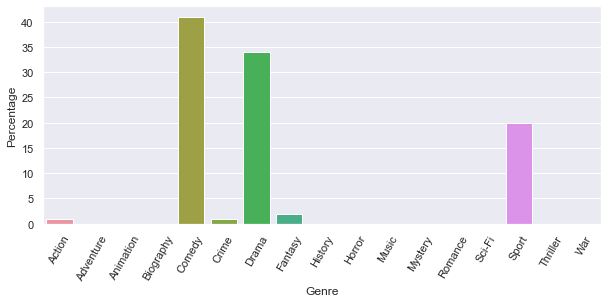

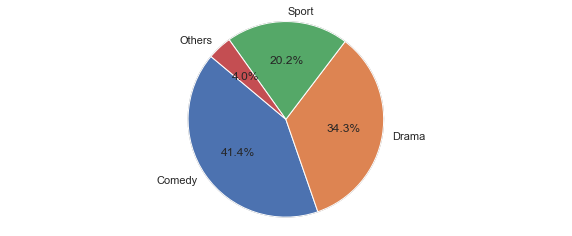

In [9]:
movie_name = "chhichhore"
test_review = ""

with open(f"DNN_input_files/input2-{movie_name}.txt", "r") as fi:
    for line in fi:
        test = DataPreprocessing(line).preprocess()
        if ("sushanth" not in line.lower() and "sushant" not in line.lower() and "susant" not in line.lower()):
            test_review += test
    
print(test_review[:500])
test_review = DataPreprocessing(test_review).preprocess()

train_review, test_review = TFIDF(x_train,[test_review])
predicted = loaded_model.predict(test_review)
predicted1 = (predicted)
sum=0
for num in predicted1[0]:
    sum += num

print(np.round(predicted1*100.0/sum))
pred = np.round(predicted1*100.0/sum)

genre_list = [
    'Action',
    'Adventure',
    'Animation',
    'Biography',
    'Comedy',
    'Crime',
    'Drama',
    'Fantasy',
    'History',
    'Horror',
    'Music',
    'Mystery',
    'Romance',
    'Sci-Fi',
    'Sport',
    'Thriller',
    'War'
]


top_df = pd.DataFrame(list(zip(genre_list,pred[0])))
top_df.columns=["Genre", "Percentage"]#Barplot of most freq words
sns.set(rc={'figure.figsize':(10,4)})
g = sns.barplot(x="Genre", y="Percentage", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=60)



def pieplot(x_data, y_label) :
#     explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    data = list(zip(x_data, y_label))

    exploded = []
    y_label_1 = []
    gt_10_values = []
    gt_10_genres = []
    others = 0
    for i, percent in enumerate(x_data):
        if percent >= 10:
            gt_10_values.append(percent)
            gt_10_genres.append(y_label[i])
        else:
            others += percent
    gt_10_values.append(others)
    gt_10_genres.append("Others")
#     top_3_tuples = data[0:3]
    fig1, ax1 = plt.subplots()
    
    ax1.pie(gt_10_values, labels=gt_10_genres, autopct='%1.1f%%', radius=2000,
            shadow=True, startangle=140)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.savefig(f'{movie_name}_pre_sushant.png', dpi=300, format="tiff", pil_kwargs={"compression": "tiff_lzw"}, bbox_inches = "tight")

pieplot(pred[0], genre_list)


# piechart of 5 reviews 

# Glove model

In [1]:
from gensim.models import Word2Vec
# define training data
glove_input = []
for line in x_train:
    glove_input.append(line.split())
for line in x_test:
    glove_input.append(line.split())    
# train model
model = Word2Vec(glove_input, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words[0:10])
# access vector for one word
print(model['sentence'])
# save model
model.wv.save_word2vec_format('word2vec.txt', binary=False)

# RNN Model

In [26]:
from tensorflow.keras.layers import Dropout, Dense, GRU, Embedding
from tensorflow.keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
import tensorflow as tf

def loadData_Tokenizer(X_train, X_test,MAX_NB_WORDS=75000,MAX_SEQUENCE_LENGTH=500):
    np.random.seed(7)
    text = np.concatenate((X_train, X_test), axis=0)
    text = np.array(text)
    tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    word_index = tokenizer.word_index
    text = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
    print('Found %s unique tokens.' % len(word_index))
    indices = np.arange(text.shape[0])
    # np.random.shuffle(indices)
    text = text[indices]
    print(text.shape)
    X_train = text[0:len(X_train), ]
    X_test = text[len(X_train):, ]
    embeddings_index = {}
    f = open("glove.txt", encoding="utf8")
    for line in f:
        values = line.split()
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype='float32')
        except:
            pass
        embeddings_index[word] = coefs
    f.close()
    print('Total %s word vectors.' % len(embeddings_index))
    return (X_train, X_test, word_index,embeddings_index)

def Build_Model_RNN_Text(word_index, embeddings_index, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    """
    def buildModel_RNN(word_index, embeddings_index, nclasses,  MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=50, dropout=0.5):
    word_index in word index ,
    embeddings_index is embeddings index, look at data_helper.py
    nClasses is number of classes,
    MAX_SEQUENCE_LENGTH is maximum lenght of text sequences
    """
    model = Sequential()
    hidden_layer = 3
    gru_node = 32
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) != len(embedding_vector):
                print("could not broadcast input array from shape", str(len(embedding_matrix[i])),
                      "into shape", str(len(embedding_vector)), " Please make sure your"
                                                                " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    print(gru_node)
    for i in range(0,hidden_layer):
        model.add(GRU(gru_node,return_sequences=True, recurrent_dropout=0.2))
        model.add(Dropout(dropout))
    model.add(GRU(gru_node, recurrent_dropout=0.2))
    model.add(Dropout(dropout))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(nclasses, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=[tf.keras.metrics.AUC()])
    return model

In [5]:
from tensorflow.keras.models import load_model

x_train = pd.read_csv('5_test_train_dataset/x_test.csv')['review']
x_test = pd.read_csv('5_test_train_dataset/x_train.csv')['review']
y_train = pd.read_csv('5_test_train_dataset/y_test.csv')
y_test = pd.read_csv('5_test_train_dataset/y_train.csv')
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(x_train,x_test)
model_RNN = Build_Model_RNN_Text(word_index, embeddings_index, 17)
csv_logger = CSVLogger('RNN_training.log', separator=',', append=True)


filepath = "model_RNN.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
new_model = load_model(filepath)
new_model.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=1,
                              batch_size=128,
                              verbose=2,
                              callbacks = [csv_logger, checkpoint])
new_model = load_model(filepath)

checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
new_model.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=1,
                              batch_size=128,
                              verbose=2,
                              callbacks = [csv_logger, checkpoint])
# predicted = Build_Model_RNN_Text.predict_classes(X_test_Glove)
# print(metrics.classification_report(y_test, np.round(predicted)))

Found 79628 unique tokens.
(22920, 500)
Total 79628 word vectors.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
32
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 18336 samples, validate on 4584 samples

Epoch 00001: loss improved from inf to 0.13590, saving model to model_RNN.h5
18336/18336 - 701s - loss: 0.1359 - auc: 0.9745 - val_loss: 0.2237 - val_auc: 0.9371
Train on 18336 samples, validate on

In [31]:

# for i in range(0,5):
filepath = "model_RNN.h5"
jsonpath = "model_RNN.json"
model_RNN = load_model(jsonpath, filepath)
# checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
# new_model.fit(X_train_Glove, y_train,
#                               validation_data=(X_test_Glove, y_test),
#                               epochs=1,
#                               batch_size=128,
#                               verbose=2,
#                               callbacks = [csv_logger, checkpoint])

Loaded model from disk


In [32]:
# from keras.utils.vis_utils import plot_model
# plot_model(model_RNN, to_file='model_RNN.png')
model_RNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          6303700   
_________________________________________________________________
gru (GRU)                    (None, 500, 32)           12768     
_________________________________________________________________
dropout (Dropout)            (None, 500, 32)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 500, 32)           6240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 500, 32)           6240      
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 32)           0

# Plot RNN

Index(['epoch', 'auc', 'loss', 'val_auc', 'val_loss'], dtype='object')


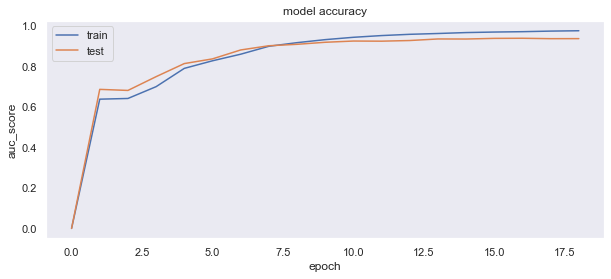

In [54]:
log_data = pd.read_csv('RNN_training.log', sep=',', engine='python')
plot_model_loss_acc(log_data, "model_rnn")


In [33]:
X_train_Glove,X_test_Glove, word_index, embeddings_index = loadData_Tokenizer(x_train,x_test)


predicted = model_RNN.predict(X_test_Glove)

predicted1 = (predicted)
# print(predicted1)
for idx, row in enumerate(predicted1):
    sum=0
    for row2 in row:
        sum += row2
    for idx2, row2 in enumerate(row):
        predicted1[idx][idx2] = predicted1[idx][idx2]*1.0/sum
print((predicted1*1.0/sum))
print(metrics.r2_score(y_test1, predicted1))
print(metrics.mean_squared_error(y_test1, predicted1))

Found 79628 unique tokens.
(22920, 500)
Total 79628 word vectors.


InvalidArgumentError: indices[13,433] = 73969 is not in [0, 63037)
	 [[{{node embedding_1_1/embedding_lookup}}]]

# CNN Model

In [24]:
from keras.layers import Dropout, Dense,Input,Embedding,Flatten, MaxPooling1D, Conv1D
from keras.models import Sequential,Model
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.merge import Concatenate


def Build_Model_CNN_Text(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
    """
        def buildModel_CNN(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100, dropout=0.5):
        word_index in word index ,
        embeddings_index is embeddings index, look at data_helper.py
        nClasses is number of classes,
        MAX_SEQUENCE_LENGTH is maximum lenght of text sequences,
        EMBEDDING_DIM is an int value for dimention of word embedding look at data_helper.py
    """
    model = Sequential()
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])),
                                 "into shape",str(len(embedding_vector))," Please make sure your"
                                 " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    embedding_layer = Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True)
    # applying a more complex convolutional approach
    convs = []
    filter_sizes = []
    layer = 5
    print("Filter  ",layer)
    for fl in range(0,layer):
        filter_sizes.append((fl+2))
    node = 128
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    for fsz in filter_sizes:
        l_conv = Conv1D(node, kernel_size=fsz, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(5)(l_conv)
        #l_pool = Dropout(0.25)(l_pool)
        convs.append(l_pool)
    l_merge = Concatenate(axis=1)(convs)
    l_cov1 = Conv1D(node, 5, activation='relu')(l_merge)
    l_cov1 = Dropout(dropout)(l_cov1)
    l_pool1 = MaxPooling1D(5)(l_cov1)
    l_cov2 = Conv1D(node, 5, activation='relu')(l_pool1)
    l_cov2 = Dropout(dropout)(l_cov2)
    l_pool2 = MaxPooling1D(30)(l_cov2)
    l_flat = Flatten()(l_pool2)
    l_dense = Dense(1024, activation='relu')(l_flat)
    l_dense = Dropout(dropout)(l_dense)
    l_dense = Dense(512, activation='relu')(l_dense)
    l_dense = Dropout(dropout)(l_dense)
    preds = Dense(nclasses, activation='sigmoid')(l_dense)
    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

Using TensorFlow backend.


# Train CNN

In [156]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(x_train,x_test)
model_CNN = Build_Model_CNN_Text(word_index, embeddings_index, 20)

model_CNN.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=20,
                              batch_size=128,
                              verbose=2)
predicted = loaded_model.predict(X_test_Glove)
print(predicted[0])
sum=0
for i in predicted[0]:
    sum+=i
print(sum)
# predicted = np.argmax(predicted, axis=1)
print(metrics.classification_report(y_test, np.where(predicted, 1, 0)))




Found 63036 unique tokens.
(15750, 500)
Total 63036 word vectors.


NameError: name 'Build_Model_CNN_Text' is not defined

In [25]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(x_train,x_test)

predicted = loaded_model.predict(X_test_Glove)
predicted1 = (predicted)
# print(predicted1)
for idx, row in enumerate(predicted1):
    sum=0
    for row2 in row:
        sum += row2
    for idx2, row2 in enumerate(row):
        predicted1[idx][idx2] = predicted1[idx][idx2]*1.0/sum
# print((predicted1*1.0/sum))
print(metrics.r2_score(y_test1, predicted1))
print(metrics.mean_squared_error(y_test1, predicted1))

Found 79628 unique tokens.
(22920, 500)
Total 79628 word vectors.


InvalidArgumentError: indices[27,387] = 73986 is not in [0, 63037)
	 [[{{node embedding_2/embedding_lookup}}]]

# Predict CNN

In [22]:
loaded_model = load_model("model_CNN.json", "model_CNN.h5")

Loaded model from disk


Index(['epoch', 'auc_1', 'loss', 'val_auc_1', 'val_loss'], dtype='object')


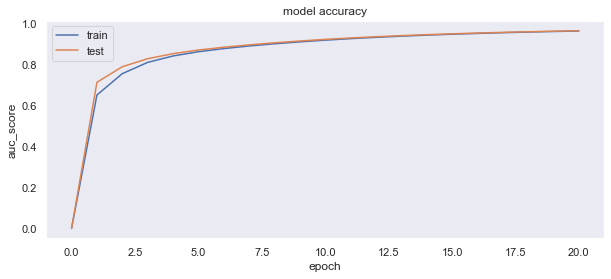

In [55]:
log_data = pd.read_csv('CNN_training.log', sep=',', engine='python')
plot_model_loss_acc(log_data, "model_cnn", auc_var = "auc_1")

Loaded model from disk
Found 58664 unique tokens.
(12601, 500)
Total 400000 word vectors.
[[ 6.  6.  2.  8.  4.  7.  1. 15.  3.  3.  6.  2.  2.  4.  6.  4.  6.  5.
   4.  6.]]
[15.0, 8.0, 7.0]


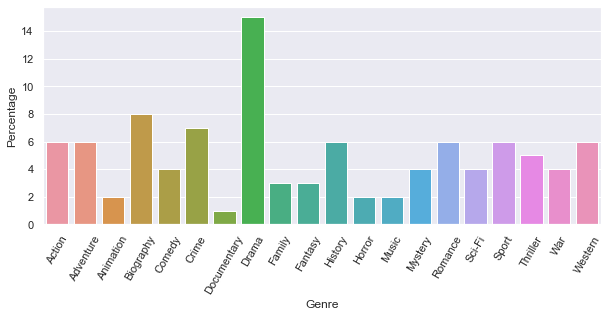

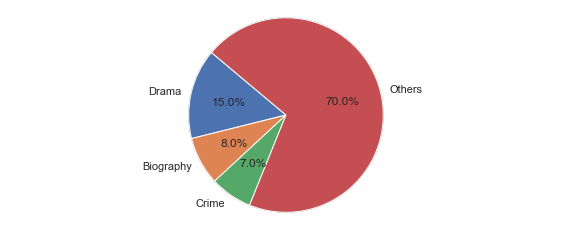

In [145]:

with open("DNN_input_files/input2-AHS.txt", "r") as fi:
    test_review = fi.read()
test_review = DataPreprocessing(test_review).preprocess()

train_review, test_review, word_index,embeddings_index = loadData_Tokenizer(x_train,[test_review])
predicted = loaded_model.predict(test_review)
predicted1 = (predicted)
sum=0
for num in predicted1[0]:
    sum += num
print(np.round(predicted1*100.0/sum))
pred = np.round(predicted1*100.0/sum)
genre_list = [
    'Action',
    'Adventure',
    'Animation',
    'Biography',
    'Comedy',
    'Crime',
    'Documentary',
    'Drama',
    'Family',
    'Fantasy',
    'History',
    'Horror',
    'Music',
    'Mystery',
    'Romance',
    'Sci-Fi',
    'Sport',
    'Thriller',
    'War',
    'Western'
]


top_df = pd.DataFrame(list(zip(genre_list,pred[0])))
top_df.columns=["Genre", "Percentage"]#Barplot of most freq words
sns.set(rc={'figure.figsize':(10,4)})
g = sns.barplot(x="Genre", y="Percentage", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=60)



def pieplot(x_data, y_label) :
#     explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    data = list(zip(x_data, y_label))
    data.sort(reverse=True)
    exploded = []
    y_label_1 = []
    top_3_tuples = data[0:3]
    top_3_values = [item[0] for item in top_3_tuples]
    top_3_genres = [item[1] for item in top_3_tuples]
    top_3_genres.append("Others")
    print(top_3_values)
    top_3_values.append(100 - (math.fsum(top_3_values)))
    exploded = (1, 0, 0, 0)
    
        
    fig1, ax1 = plt.subplots()
    
    ax1.pie(top_3_values, explode = exploded, labels=top_3_genres, autopct='%1.1f%%', radius=2000,
            shadow=True, startangle=140)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
pieplot(pred[0], genre_list)



# Plot CNN

Index(['epoch', 'auc', 'loss', 'val_auc', 'val_loss'], dtype='object')


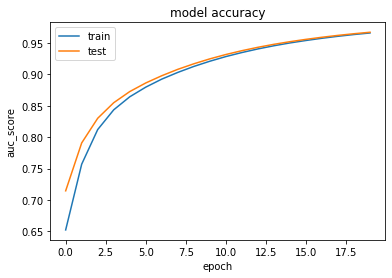

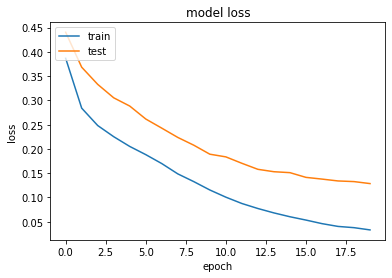

In [11]:
log_data = pd.read_csv('CNN_training.log', sep=',', engine='python')
plot_model_loss_acc(log_data)

# RCNN model

In [22]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
import numpy as np
from sklearn import metrics
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
def Build_Model_RCNN_Text(word_index, embeddings_index, nclasses, MAX_SEQUENCE_LENGTH=500, EMBEDDING_DIM=100):
    kernel_size = 2
    filters = 256
    pool_size = 2
    gru_node = 256
    embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            if len(embedding_matrix[i]) !=len(embedding_vector):
                print("could not broadcast input array from shape",str(len(embedding_matrix[i])),
                                 "into shape",str(len(embedding_vector))," Please make sure your"
                                 " EMBEDDING_DIM is equal to embedding_vector file ,GloVe,")
                exit(1)
            embedding_matrix[i] = embedding_vector
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                                EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=MAX_SEQUENCE_LENGTH,
                                trainable=True))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
    model.add(LSTM(gru_node, recurrent_dropout=0.2))
    model.add(Dense(1024,activation='relu'))
    model.add(Dense(nclasses))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=[tf.keras.metrics.AUC()])
    return model

In [29]:
X_train_Glove,X_test_Glove, word_index,embeddings_index = loadData_Tokenizer(x_train,x_test)
csv_logger = CSVLogger('RCNN_training.log', separator=',', append=True)
filepath = "model_RCNN.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

model_RCNN = Build_Model_RCNN_Text(word_index,embeddings_index, 17)
model_RCNN.summary()
model_RCNN.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=1,
                              batch_size=128,
                              verbose=2,
                              callbacks = [csv_logger, checkpoint])


checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
new_model = load_model(filepath)
new_model.fit(X_train_Glove, y_train,
                              validation_data=(X_test_Glove, y_test),
                              epochs=1,
                              batch_size=128,
                              verbose=2,
                              callbacks = [csv_logger, checkpoint])

# predicted = Build_Model_RNN_Text.predict_classes(X_test_Glove)
# print(metrics.classification_report(y_test, np.round(predicted)))

Found 79628 unique tokens.
(22920, 500)
Total 79628 word vectors.


ValueError: Operation 'VarIsInitializedOp_260' has been marked as not fetchable.

In [91]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix
from pandas import DataFrame as df

target_names = genre_list

classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', OneVsRestClassifier(LinearSVC()))])
classifier.fit(x_train, y_train)
predicted = classifier.predict(x_test)


print(metrics.classification_report(y_test,predicted))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))


              precision    recall  f1-score   support

           0       0.94      0.74      0.83       510
           1       0.96      0.79      0.87       605
           2       0.99      0.84      0.91       285
           3       0.98      0.80      0.88       465
           4       0.97      0.81      0.88       620
           5       0.95      0.73      0.83       390
           6       0.00      0.00      0.00         0
           7       0.93      0.98      0.95      2185
           8       0.97      0.70      0.82       250
           9       0.95      0.60      0.73       270
          10       0.98      0.73      0.84       255
          11       0.99      0.81      0.89       255
          12       0.99      0.72      0.83       250
          13       0.96      0.70      0.81       325
          14       0.97      0.68      0.80       325
          15       0.96      0.75      0.84       300
          16       0.99      0.76      0.86       250
          17       0.93    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[33.  0.  0.  0. 33. 33.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]


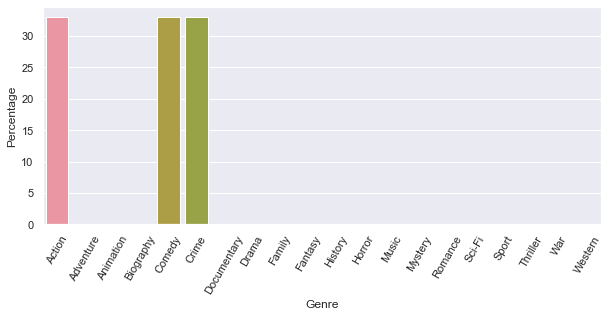

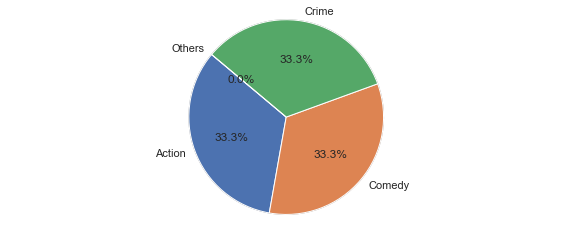

In [104]:
with open("DNN_input_files/input2-hera_pheri.txt", "r") as fi:
    test_review = fi.read()
test_review = DataPreprocessing(test_review).preprocess()

predicted = classifier.predict([test_review])
predicted1 = (predicted)
sum=0
for num in predicted1[0]:
    sum += num
print(np.round(predicted1*100.0/sum))
pred = np.round(predicted1*100.0/sum)
genre_list = [
    'Action',
    'Adventure',
    'Animation',
    'Biography',
    'Comedy',
    'Crime',
    'Documentary',
    'Drama',
    'Family',
    'Fantasy',
    'History',
    'Horror',
    'Music',
    'Mystery',
    'Romance',
    'Sci-Fi',
    'Sport',
    'Thriller',
    'War',
    'Western'
]


top_df = pd.DataFrame(list(zip(genre_list,pred[0])))
top_df.columns=["Genre", "Percentage"]#Barplot of most freq words
sns.set(rc={'figure.figsize':(10,4)})
g = sns.barplot(x="Genre", y="Percentage", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=60)



def pieplot(x_data, y_label) :
#     explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    data = list(zip(x_data, y_label))
#     data.sort(reverse=True)
#     exploded = []
#     y_label_1 = []
#     top_3_tuples = data[0:3]
#     top_3_values = [item[0] for item in top_3_tuples]
#     top_3_genres = [item[1] for item in top_3_tuples]
#     top_3_genres.append("Others")
#     print(top_3_values)
#     top_3_values.append(100 - (math.fsum(top_3_values)))
#     exploded = (1, 0, 0, 0)
    
    exploded = []
    y_label_1 = []
    gt_10_values = []
    gt_10_genres = []
    others = 0
    for i, percent in enumerate(x_data):
        if percent >= 10:
            gt_10_values.append(percent)
            gt_10_genres.append(y_label[i])
        else:
            others += percent
    gt_10_values.append(others)
    gt_10_genres.append("Others")
#     top_3_tuples = data[0:3]
    fig1, ax1 = plt.subplots()
    
    ax1.pie(gt_10_values, labels=gt_10_genres, autopct='%1.1f%%', radius=2000,
            shadow=True, startangle=140)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()
pieplot(pred[0], genre_list)

In [117]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import multilabel_confusion_matrix
from pandas import DataFrame as df

target_names = genre_list

classifier = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('reg', MultiOutputRegressor(GradientBoostingRegressor(random_state=0)))])
classifier.fit(x_train, y_train)
predicted = classifier.predict(x_test)

print(np.round(predicted[0]))
print(metrics.classification_report(y_test, np.round(predicted)))

KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix
from pandas import DataFrame as df
from mlxtend.preprocessing import DenseTransformer
import scipy

target_names = genre_list
classifiers = [LinearDiscriminantAnalysis, KNeighborsClassifier, GaussianNB, SVC, DecisionTreeClassifier, LinearSVC]
# prepipe = Pipeline([
#             ('vectorizer', CountVectorizer()),
#             ('to_dense', DenseTransformer()),
#             ('tfidf', TfidfTransformer())])

for clss in classifiers:
    try:
        classifier = Pipeline([
            ('vectorizer', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('clf', OneVsRestClassifier(clss()))])
        classifier.fit(x_train, y_train)
        predicted = classifier.predict(x_test)
    except Exception as e:
        print(str(e) + str(clss))
        continue


    print(metrics.classification_report(y_test,predicted))


A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>


/opt/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` para

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       510
           1       0.93      0.90      0.91       605
           2       0.97      0.95      0.96       285
           3       0.96      0.91      0.93       465
           4       0.96      0.89      0.92       620
           5       0.95      0.87      0.91       390
           6       0.00      0.00      0.00         0
           7       0.97      0.98      0.97      2185
           8       0.94      0.86      0.90       250
           9       0.93      0.83      0.88       270
          10       0.96      0.89      0.92       255
          11       0.97      0.90      0.94       255
          12       0.98      0.90      0.94       250
          13       0.95      0.86      0.91       325
          14       0.95      0.83      0.88       325
          15       0.93      0.86      0.89       300
          16       0.97      0.89      0.93       250
          17       0.93    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))


In [ ]:
%%time

from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import multilabel_confusion_matrix
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from joblib import dump, load
import time
from scipy.sparse import csr_matrix
from sklearn.base import TransformerMixin




names = [ "Naive Bayes", "Gaussian Process", "Neural Net", "QDA"]

genre_list = [
    'Action',
    'Adventure',
    'Animation',
    'Biography',
    'Comedy',
    'Crime',
    'Documentary',
    'Drama',
    'Family',
    'Fantasy',
    'History',
    'Horror',
    'Music',
    'Mystery',
    'Romance',
    'Sci-Fi',
    'Sport',
    'Thriller',
    'War',
    'Western'
]

target_names = genre_list
classifiers = [
    GaussianNB(),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    MLPClassifier(max_iter=100),
    QuadraticDiscriminantAnalysis()]

x_train = pd.read_csv('5_test_train_dataset/x_test.csv')['review']
x_test = pd.read_csv('5_test_train_dataset/x_train.csv')['review']
y_train = pd.read_csv('5_test_train_dataset/y_test.csv')
y_test = pd.read_csv('5_test_train_dataset/y_train.csv')

class DenseTransformer(TransformerMixin):
    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

for name, clf in zip(names, classifiers):
    start = time.process_time()
    classifier0 = Pipeline([
      ('vectorizer', CountVectorizer()),
      ('tfidf', TfidfTransformer()),
      ('to_dense', DenseTransformer()), 
      ('clf', OneVsRestClassifier(clf))])
    #df_ohe = pd.get_dummies(x_train, columns=genre_list)
    #x_train = csr_matrix(df_ohe.values)
    classifier0.fit(x_train, y_train)
    predicted = classifier0.predict(x_test)

    print(name)
    print(metrics.classification_report(y_test, np.round(predicted)))
    print(time.process_time() - start)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:75: UserWarning: Label not 6 is present in all training examples.
  str(classes[c]))


Naive Bayes


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.68      0.53      0.59       510
           1       0.68      0.59      0.63       605
           2       0.89      0.49      0.64       285
           3       0.67      0.57      0.61       465
           4       0.67      0.53      0.59       620
           5       0.62      0.40      0.49       390
           6       0.00      0.00      0.00         0
           7       0.87      0.86      0.86      2185
           8       0.75      0.39      0.51       250
           9       0.63      0.32      0.43       270
          10       0.64      0.31      0.41       255
          11       0.73      0.33      0.45       255
          12       0.72      0.35      0.47       250
          13       0.66      0.40      0.50       325
          14       0.61      0.30      0.40       325
          15       0.57      0.27      0.36       300
          16       0.73      0.38      0.50       250
          17       0.58    